In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 



## Circuito RLC paralelo.

En un circuito  RLC paralelo en resonancia, $w_o  = \frac{1}{ \sqrt{LC} } $, el $Q_o$ se calcula como:

$$ Q_o = \frac{Pot_{reactiva}}{ Pot_{activa}} = \frac{ \frac{v_g^2}{w_o \cdot L} }{ \frac{v_g^2}{R} } = \frac{R}{w_o \cdot L} $$


$$ Q_o = \frac{Pot_{reactiva}}{ Pot_{activa}} =  \frac{v_g^2 \cdot w_o \cdot C }{ \frac{v_g^2}{R} } = R \cdot w_o \cdot C $$

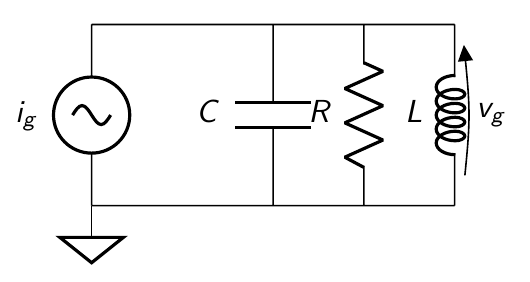

In [18]:
Image(filename= "fig/RLCpara.png",width=350)

## Circuito RLC serie.

En un circuito  RLC serie en resonancia, $w_o  = \frac{1}{ \sqrt{LC} } $, el $Q_o$ se calcula como:

$$ Q_o = \frac{Pot_{reactiva}}{ Pot_{activa}} = \frac{ \frac{i_g^2}{w_o \cdot C} }{i_g^2 \cdot R } = \frac{1}{R \cdot w_o \cdot C} $$


$$ Q_o = \frac{Pot_{reactiva}}{ Pot_{activa}} =  \frac{i_g^2 \cdot w_o \cdot L }{ i_g^2 \cdot R } = \frac{w_o \cdot L}{R } $$

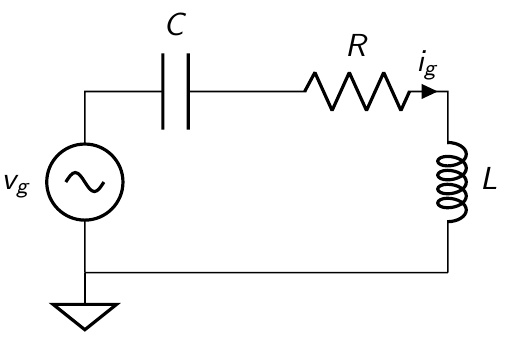

In [19]:
Image(filename= "fig/RLCserie.png",width=350)

### Conversion serie paralelo

En un circuito RLC paralelo, la impedancia de entrada se calcula como:

$$ \frac{1}{ Z_p}  = \frac{1}{R_p}   + \frac{1}{j \cdot X_p} $$

$$ \frac{1}{ Z_p}  = \frac{R_p + j \cdot X_p }{R_p \cdot j \cdot X_p }  $$

$$ Z_p  =  \frac{R_p \cdot j \cdot X_p }{R_p + j \cdot X_p } \cdot \frac{R_p - j \cdot X_p }{R_p - j \cdot X_p }  $$

$$ Z_p  =  \frac{R_p \cdot j \cdot X_p \cdot (R_p - j \cdot X_p) }{(R_p^2 +  X_p^2 ) } $$

$$ Z_p  =  \frac{( R_p \cdot X_p^2 ) + j \cdot ( R_p^2 \cdot X_p) }{(R_p^2 +   X_p^2) } $$

$$ Z_p  =  \frac{( R_p \cdot X_p^2 ) }{(R_p^2 +   X_p^2) } + j \cdot \frac{ ( R_p^2 \cdot X_p) }{(R_p^2 +   X_p^2)} $$


$$ Z_p  =  \frac{( R_p \cdot (\frac{R_p}{Q_o})^2 ) }{(R_p^2 +   (\frac{R_p}{Q_o})^2) } + j \cdot \frac{ ( R_p^2 \cdot X_p) }{(R_p^2 +   (\frac{R_p}{Q_o})^2)}$$

En un circuito RLC serie, la impedancia de entrada se calcula como:

$$  Z_s  = R_s   + j \cdot X_s $$

#### Entonces, en resonancia, igualando la parte real de la impedancia :

$$  R_s = \frac{( R_p \cdot X_p^2 ) }{(R_p^2 +   X_p^2) } $$

En resonancia, $Q_o = \frac{R}{X_p} $, entonces $X_p = \frac{R}{Q_o} $. Remplazando resulta:

$$  R_s = \frac{( R_p \cdot (\frac{R_p}{Q_o})^2 ) }{(R_p^2 +   (\frac{R_p}{Q_o})^2) } $$

Sacando $ R_p^2 $ como factor comun y simplificando resulta:

$$  R_s = \frac{ R_p \cdot (\frac{1}{Q_o^2})  }{(1 +   (\frac{1}{Q_o^2})) } = \frac{ R_p }{(1 +   Q_o^2) } $$


#### Entonces, en resonancia, igualando la parte imaginaria de la impedancia :

$$  X_s = \frac{ ( R_p^2 \cdot X_p) }{(R_p^2 +   (\frac{R_p}{Q_o})^2)} $$

$$  X_s = \frac{ X_p }{(1 +   \frac{1}{Q_o^2})} $$

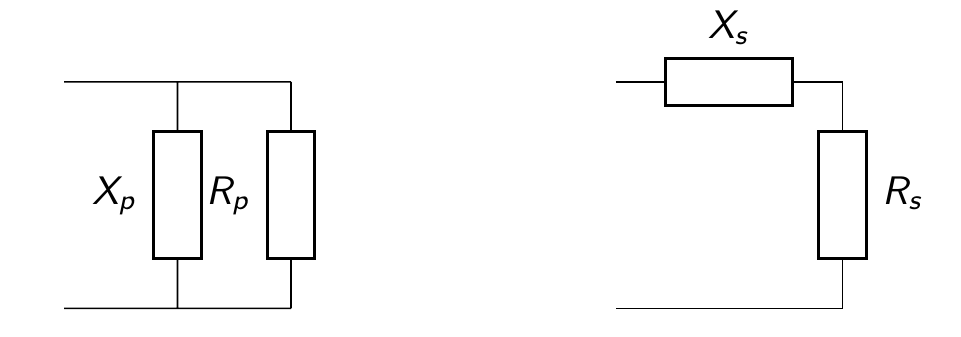

In [20]:
Image(filename= "fig/paraserie.png",width=550)

## $Q_o $ ($Q$ libre) y  $Q_c $ ($Q$ cargado) en circuitos RLC paralelos.

El $ Q_o $ (libre) de un inductor para el modelo paralelo, dada una resistencia de perdida $r_p$ se calcula como:

$$ Q_o =  \frac{r_p}{w_o \cdot L} $$

El $ Q_c $ (cargado) de un inductor para el modelo paralelo, dada una resistencia total $\frac{1}{r} = \frac{1}{r_p} + \frac{1}{R}  $ se calcula como:

$$ Q_c =  \frac{r}{w_o \cdot L} $$

Entonces, remplazando $ r $:

$$ \frac{1}{Q_c} = \frac{w_o \cdot L}{r} = \frac{w_o \cdot L}{r_p} + \frac{w_o \cdot L}{R}   $$

$$ \frac{1}{Q_c} =  \frac{1}{Q_o} + \frac{w_o \cdot L}{R}   $$

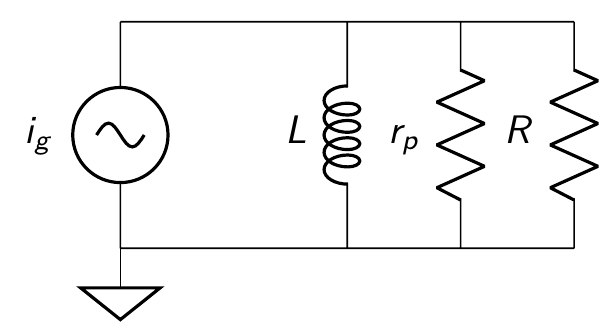

In [21]:
Image(filename= "fig/qcpara.png",width=350)

## $Q_o $ ($Q$ libre) y  $Q_c $ ($Q$ cargado) en circuitos RLC serie.

El $ Q_o $ (libre) de un inductor para el modelo paralelo, dada una resistencia de perdida $r_s$ se calcula como:

$$ Q_o =  \frac{w_o \cdot L}{r_s} $$

El $ Q_c $ (cargado) de un inductor para el modelo paralelo, dada una resistencia total $r = r_s + R  $ se calcula como:

$$ Q_c =  \frac{w_o \cdot L}{r} $$

Entonces, remplazando $ r $:

$$ \frac{1}{Q_c} = \frac{r}{w_o \cdot L} = \frac{r_s}{w_o \cdot L} + \frac{R}{w_o \cdot L}   $$

$$ \frac{1}{Q_c} =  \frac{1}{Q_o} + \frac{R}{w_o \cdot L}   $$

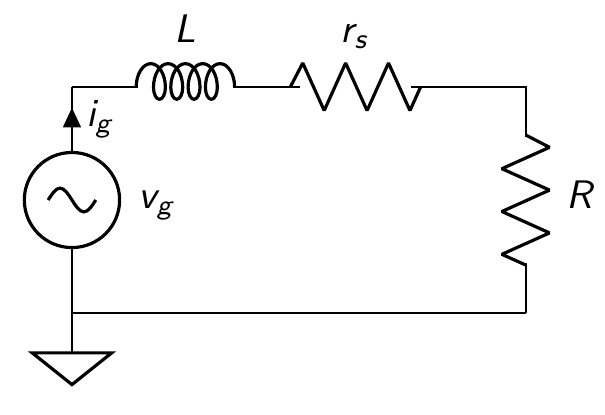

In [22]:
Image(filename= "fig/qcserie.png",width=350)